In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Pratham\Downloads\Dataset_1 - Sheet1.csv")
X = df[['House Area', 'Number of rooms']].values
y = df['Price'].values                    
df=df.rename(columns={'House Area':'area','Number of rooms':'rooms','Price':'house_price'})
print(df.head())


   House ID  area  rooms  house_price
0         1  6274      8         2100
1         2  6689      5         2200
2         3  4276      8         1400
3         4  5130      9         1700
4         5  6035      6         2000


In [2]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((X, ones))
print(X)

[[6.274e+03 8.000e+00 1.000e+00]
 [6.689e+03 5.000e+00 1.000e+00]
 [4.276e+03 8.000e+00 1.000e+00]
 [5.130e+03 9.000e+00 1.000e+00]
 [6.035e+03 6.000e+00 1.000e+00]
 [2.946e+03 1.000e+00 1.000e+00]
 [4.727e+03 1.000e+01 1.000e+00]
 [6.873e+03 7.000e+00 1.000e+00]
 [3.911e+03 4.000e+00 1.000e+00]
 [5.689e+03 5.000e+00 1.000e+00]
 [5.459e+03 5.000e+00 1.000e+00]
 [4.508e+03 4.000e+00 1.000e+00]
 [3.589e+03 8.000e+00 1.000e+00]
 [7.212e+03 3.000e+00 1.000e+00]
 [7.454e+03 9.000e+00 1.000e+00]
 [3.366e+03 6.000e+00 1.000e+00]]


In [3]:
weights = np.zeros(X.shape[1])
learning_rate = 0.0000001
epochs = 1000

In [4]:
def predict(X, weights):

    return np.dot(X, weights)

In [5]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [6]:
losses = []

for i in range(epochs):
    y_pred = predict(X, weights)
    error = y_pred - y
    gradient = (2 / len(y)) * np.dot(X.T, error)
    weights = weights - learning_rate * gradient
    losses.append(mse(y, y_pred))


c:\Users\Pratham\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:134: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Pratham\AppData\Local\Temp\ipykernel_15728\730722640.py:2: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
C:\Users\Pratham\AppData\Local\Temp\ipykernel_15728\4171413652.py:6: RuntimeWarning: overflow encountered in dot
  gradient = (2 / len(y)) * np.dot(X.T, error)
C:\Users\Pratham\AppData\Local\Temp\ipykernel_15728\4171413652.py:7: RuntimeWarning: invalid value encountered in subtract
  weights = weights - learning_rate * gradient


In [7]:
print("Weights:", weights)
print(f"Price = {weights[0]}*Area + {weights[1]}*Rooms + {weights[2]}")


Weights: [nan nan nan]
Price = nan*Area + nan*Rooms + nan


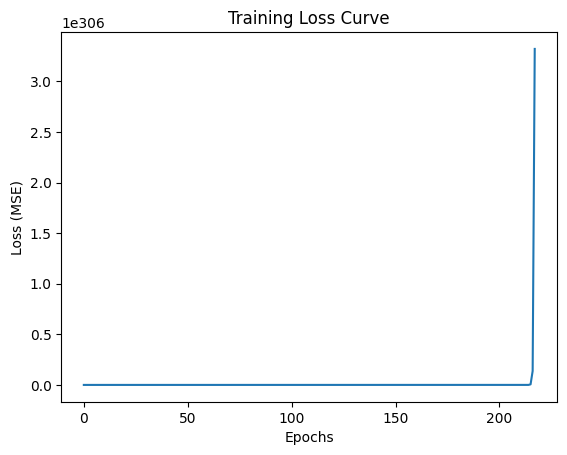

In [8]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve")
plt.show()


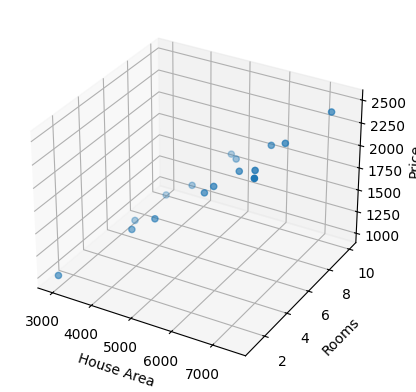

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, label='Actual Data')

area_range = np.linspace(X[:,0].min(), X[:,0].max(), 10)
rooms_range = np.linspace(X[:,1].min(), X[:,1].max(), 10)
A, R = np.meshgrid(area_range, rooms_range)

Z = weights[0]*A + weights[1]*R + weights[2]

ax.plot_surface(A, R, Z, alpha=0.5)

ax.set_xlabel('House Area')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')

plt.show()